In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
import statsmodels.api as sm
import pylab 
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('Life expectancy.csv')
df.columns = df.columns.str.strip()

In [3]:
df.head()

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,Afghanistan,Developing,263,62.0,65.0,1154,19.1,NaN,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,NaN,65.0
1,Albania,Developing,8,0.0,98.0,0,57.2,NaN,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5
2,Algeria,Developing,19,21.0,95.0,63,59.5,NaN,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6
3,Angola,Developing,335,66.0,64.0,118,23.3,NaN,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4
4,Argentina,Developing,116,8.0,94.0,0,62.8,NaN,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3


In [4]:
df.tail()

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
119,Venezuela,Developing,37,NaN,95.0,129,15.4,0.0,95,95,7.1,287.931877,8991735,6.8,7.0,0.388,8.8,55.3
120,Viet Nam,Developing,397,NaN,89.0,386,14.9,0.0,89,89,7.7,236.911438,8818438,6.9,7.1,0.371,8.2,53.4
121,Yemen,Developing,48,NaN,96.0,1064,14.5,46.0,96,96,8.1,212.661949,868346,7.0,7.3,0.359,7.6,52.0
122,Zambia,Developing,415,NaN,88.0,2738,14.1,50.0,85,88,8.0,196.597780,853625,7.2,7.4,0.343,7.2,57.0
123,Zimbabwe,Developing,438,NaN,185.0,896,13.7,54.0,76,77,8.1,21.569654,832946,7.4,7.5,0.332,100.0,48.6


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            124 non-null    object 
 1   Status             124 non-null    object 
 2   Adult_Mortality    124 non-null    int64  
 3   Infant_Deaths      110 non-null    float64
 4   Hepatitis          119 non-null    float64
 5   Measles            124 non-null    int64  
 6   BMI                124 non-null    float64
 7   Underfive_Deaths   119 non-null    float64
 8   Polio              124 non-null    int64  
 9   Diphtheria         124 non-null    int64  
 10  HIV                124 non-null    float64
 11  GDP                124 non-null    float64
 12  Population         124 non-null    int64  
 13  Malnourished10_19  124 non-null    float64
 14  Malnourished5_9    124 non-null    float64
 15  Income_Index       121 non-null    float64
 16  Schooling          119 non

In [28]:
#Renaming some column names as they contain trailing spaces .
df = df.rename(columns={"Underfive_Deaths":"Under_five_Deaths","Malnourished10_19":"Malnourished_10_19","Malnourished5_9":"Malnourished_5_9","Expected":"Life expectency"})

In [29]:
df.isnull().sum()

Country               0
Status                0
Adult_Mortality       0
Infant_Deaths         0
Hepatitis             0
Measles               0
BMI                   0
Under_five_Deaths     0
Polio                 0
Diphtheria            0
HIV                   0
GDP                   0
Population            0
Malnourished_10_19    0
Malnourished_5_9      0
Life expectency       0
dtype: int64

In [30]:
df.columns

Index(['Country', 'Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis',
       'Measles', 'BMI', 'Under_five_Deaths', 'Polio', 'Diphtheria', 'HIV',
       'GDP', 'Population', 'Malnourished_10_19', 'Malnourished_5_9',
       'Life expectency'],
      dtype='object')

Variable information:

Country: Name of the country

Status: Whether the country is Developed or Developing

Adult_Mortality: Mortality rate for age group 15-60 out of every 1000 individuals of the population

Infant_Deaths: Number of infant deaths per 1000 population

Hepatitis: Hepatitis B (HepB) immunization coverage for 1-year olds (Percentage)

Measles: Number of reported cases for measles per 1000 from population

BMI: Average Body Mass Index for entire population

Underfive_Deaths: Number of deaths under 5 years of age per 1000 population

Polio: Polio (Pol3) immunization coverage for 1-year olds (Percentage)

Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1-year olds (Percentage)

HIV: Deaths per 1000 live births due to HIV/AIDS (0-4 years)

GDP: Gross Domestic Product per capita (in USD)

Population: Population of the country

Malnourished10_19: Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

Malnourished5_9: Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

Income_Index: Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

Schooling: Number of years of Schooling

Life_Expectancy: Life Expectancy in age for the country

In [9]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


AxesSubplot(0.125,0.125;0.698618x0.755)


,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Under_five_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished_10_19,Malnourished_5_9,Life expectency
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,1.240000e+02,124.000000,124.000000,124.000000
mean,160.475806,29.207196,87.589211,2841.637097,41.733871,44.289113,86.637097,87.919355,0.819355,6866.816502,1.960604e+07,4.180645,4.373387,71.220968
std,101.794506,94.302571,24.075800,11517.586950,21.186385,155.503807,21.653342,19.122879,1.764127,10885.243579,4.100762e+07,4.086736,4.212797,8.467924
min,3.000000,0.000000,6.000000,0.000000,2.100000,0.000000,6.000000,6.000000,0.100000,5.668726,8.381000e+03,0.300000,0.200000,48.600000
25%,73.500000,1.000000,85.597222,0.750000,20.950000,1.000000,88.000000,89.000000,0.100000,639.799727,8.215560e+05,1.500000,1.575000,65.175000
50%,139.500000,10.000000,94.000000,37.000000,54.100000,11.500000,95.000000,95.000000,0.100000,2728.291765,4.234054e+06,2.400000,2.800000,72.200000
75%,234.000000,34.406593,97.000000,588.750000,59.750000,26.500000,98.000000,98.000000,0.400000,8437.562893,1.482767e+07,6.425000,6.425000,77.500000
max,438.000000,910.000000,198.000000,90387.000000,71.400000,1110.000000,99.000000,99.000000,8.100000,56554.387600,2.581621e+08,26.700000,27.300000,86.000000


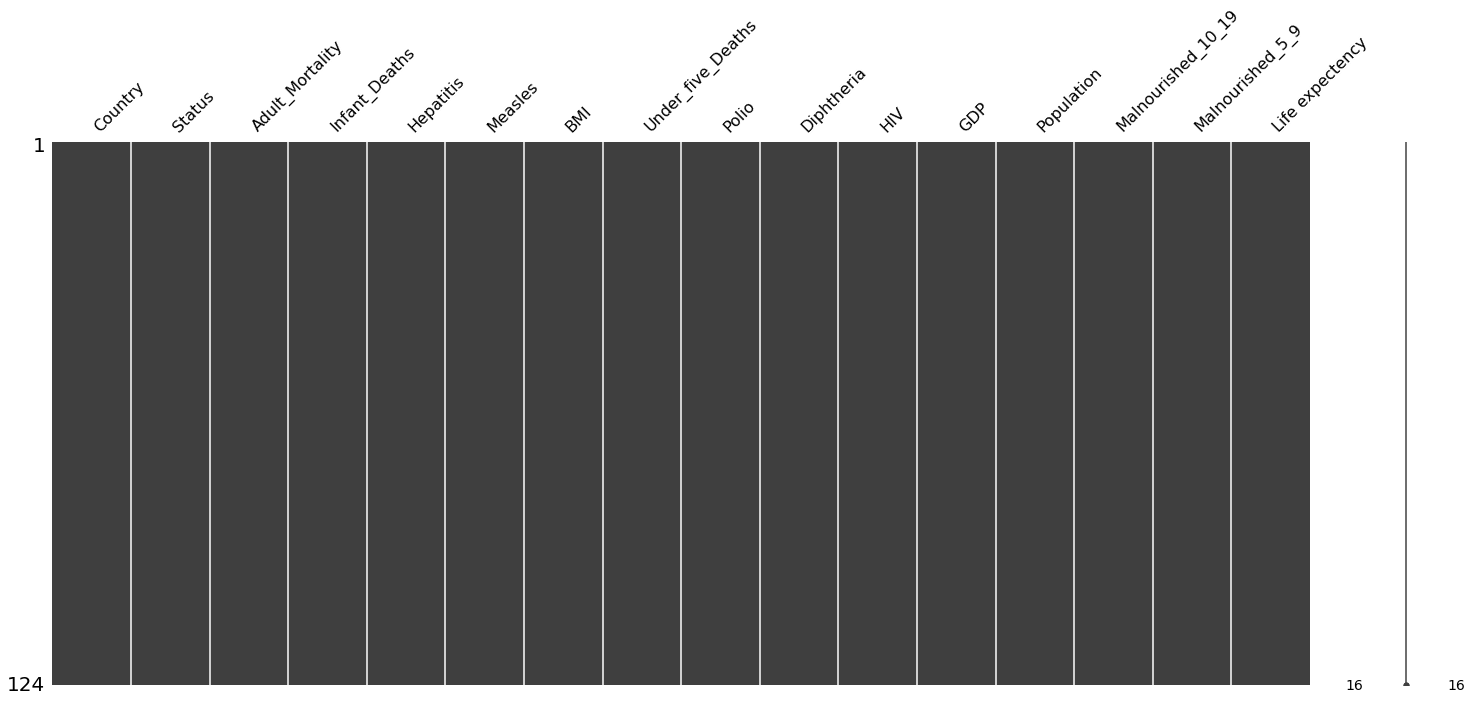

In [31]:
import missingno as msno
print(msno.matrix(df))
df.describe()

C:\Users\aaagr\AppData\Local\Temp/ipykernel_3176/406592195.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1=df[(df['Status']=='Developed')].fillna(df[(df['Status']=='Developed')].mean())
C:\Users\aaagr\AppData\Local\Temp/ipykernel_3176/406592195.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2=df[(df['Status']=='Developing')].fillna(df[(df['Status']=='Developing')].mean())


(124, 16)
AxesSubplot(0.125,0.125;0.698618x0.755)


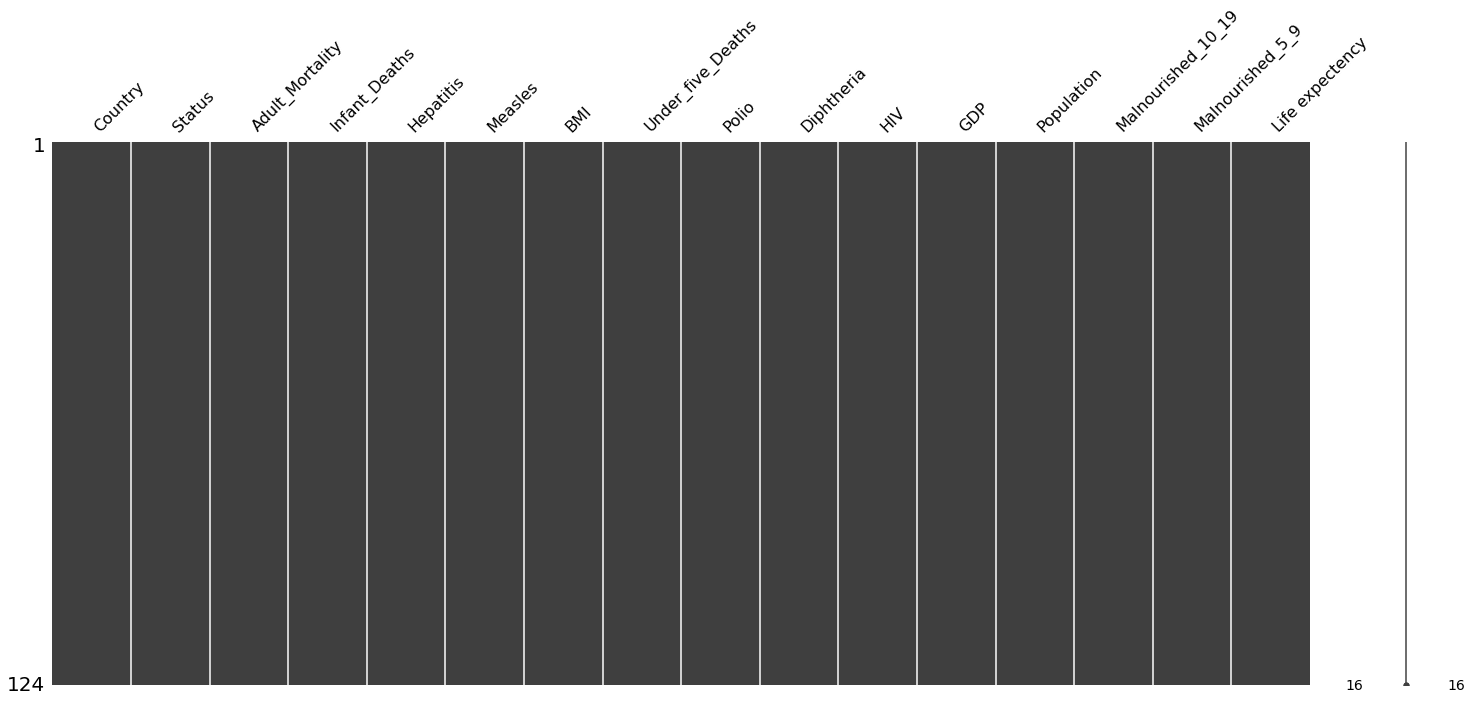

In [34]:
#Replace Missing Values Associated with Country Feature Mean
for column in df.columns:
    for i in range(len(df)): 
        country=df['Country'][i]
        status=df['Country'][i]
        if (df[column].isnull()[i]==True):
            df[column][i]=df[df['Country']==country][column].mean() 
        else:
             pass
#Fill Unresolved Values by Status
df1=df[(df['Status']=='Developed')].fillna(df[(df['Status']=='Developed')].mean())
df2=df[(df['Status']=='Developing')].fillna(df[(df['Status']=='Developing')].mean())
df=df2.append(df1)
print(df.shape)
print(msno.matrix(df))

In [35]:
df.shape

(124, 16)

We have 16 column with target column Life Expentancy and we have 124 examples. Now let's check the unique values of our dataset.

In [36]:
for i in df.columns:
    unique_values = np.unique(df[i])
    print(i)
    print(unique_values)

Country
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bosnia' 'Botswana'
 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Cambodia' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Denmark' 'Ecuador' 'Egypt'
 'El Salvador' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Georgia'
 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Haiti' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kenya' 'Kuwait' 'Lebanon' 'Liberia'
 'Luxembourg' 'Madagascar' 'Malaysia' 'Maldives' 'Mali' 'Mauritius'
 'Mexico' 'Mongolia' 'Morocco' 'Myanmar' 'Nepal' 'Netherlands'
 'New Zealand' 'Nigeria' 'Norway' 'Oman' 'Pakistan' 'Panama' 'Paraguay'
 'Peru' 'Philippines' 'Poland' 'Portugal' 'Qatar' 'Republic of Korea'
 'Romania' 'Russian Federation' 'Sa

In [37]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:",duplicate_rows.shape)

Number of duplicate rows: (0, 16)


There is no duplicated rows. So we can move on.

In [38]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_values = pd.concat([total, percent], axis = 1, keys = ['total_missing', 'percent_missing'])
missing_values.head(15)

,total_missing,percent_missing
Country,0,0.0
Status,0,0.0
Adult_Mortality,0,0.0
Infant_Deaths,0,0.0
Hepatitis,0,0.0
Measles,0,0.0
BMI,0,0.0
Under_five_Deaths,0,0.0
Polio,0,0.0
Diphtheria,0,0.0


<AxesSubplot:>

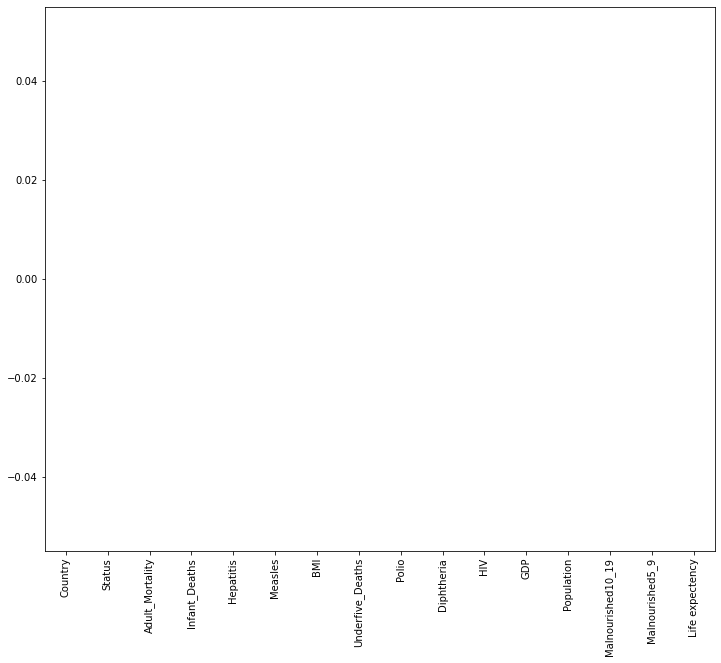

In [16]:
#visualization of Missing Values

plt.figure(figsize=(12,10))
df.isnull().sum().plot(kind='bar')

In [39]:
numerical_columns= df.select_dtypes(exclude=['object'])
categorical_columns = df.select_dtypes(include=['object'])

In [40]:
numerical_columns

,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Under_five_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished_10_19,Malnourished_5_9,Life expectency
0,263,62.0,65.0,1154,19.1,52.17,6,65,0.1,584.259210,33736494,17.2,17.3,65.0
1,8,0.0,98.0,0,57.2,52.17,98,98,0.1,4575.763787,288914,1.2,1.3,77.5
2,19,21.0,95.0,63,59.5,52.17,95,95,0.1,4132.762920,39871528,6.0,5.8,75.6
3,335,66.0,64.0,118,23.3,52.17,7,64,1.9,3695.793748,2785935,8.3,8.2,52.4
4,116,8.0,94.0,0,62.8,52.17,93,94,0.1,13467.123600,43417765,1.0,0.9,76.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,57,1.0,94.0,7,62.1,1.00,95,95,0.1,44292.884730,16939923,1.0,0.9,81.9
78,66,0.0,92.0,10,67.5,0.00,92,92,0.1,3821.893700,4649971,0.4,0.3,81.6
82,61,0.0,55.0,3,6.8,0.00,93,93,0.1,975.498560,5137232,0.8,0.7,81.6
89,117,2.0,96.0,0,61.7,2.00,92,98,0.1,12565.987600,37986412,1.9,2.0,77.5


In [41]:
categorical_columns

,Country,Status
0,Afghanistan,Developing
1,Albania,Developing
2,Algeria,Developing
3,Angola,Developing
4,Argentina,Developing
...,...,...
77,Netherlands,Developed
78,New Zealand,Developed
82,Pakistan,Developed
89,Qatar,Developed


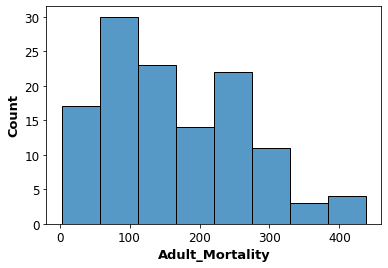

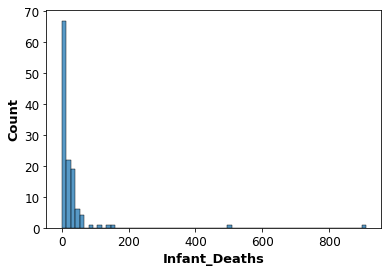

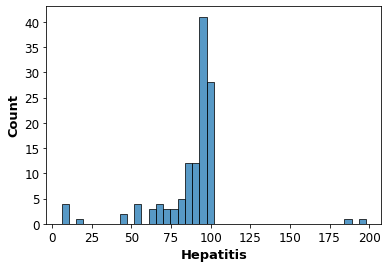

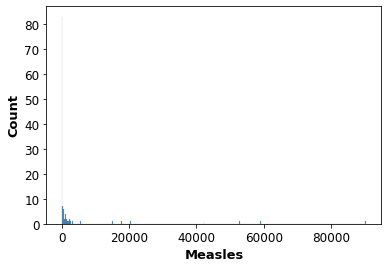

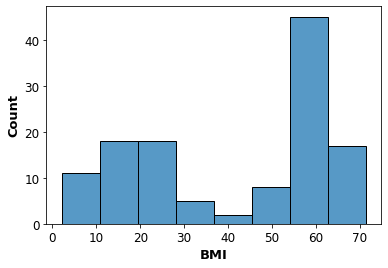

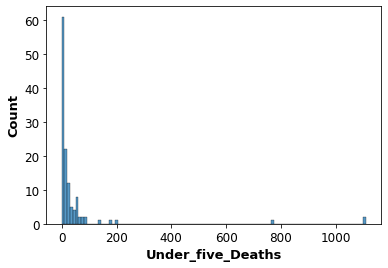

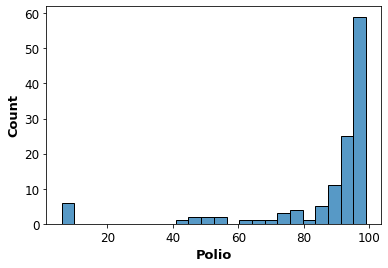

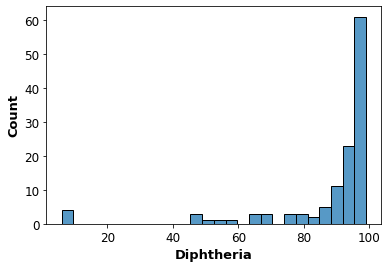

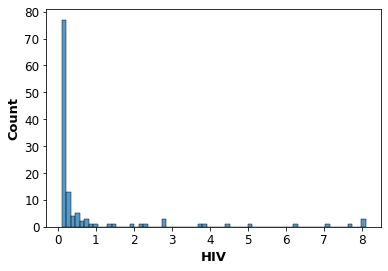

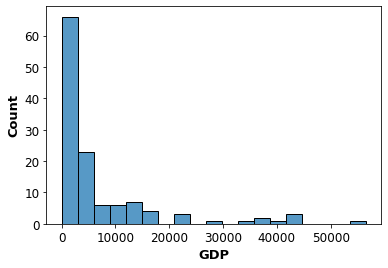

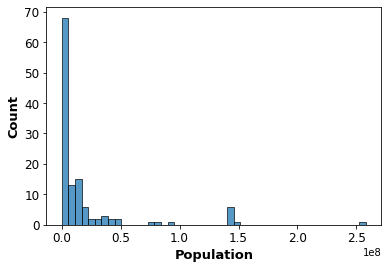

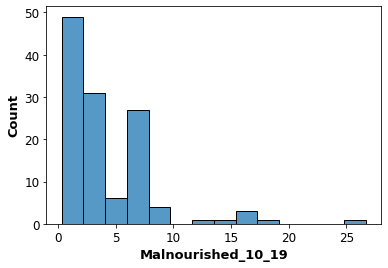

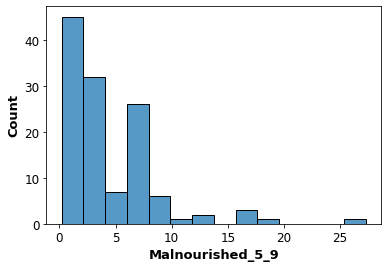

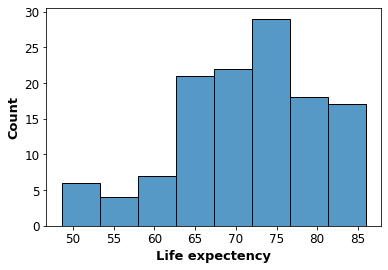

In [42]:
#Histplot of Features
for feature in numerical_columns.columns:
    sns.histplot(x =numerical_columns[feature])
    plt.xticks(fontsize= 12)
    plt.yticks(fontsize=12)
    plt.ylabel("Count", fontsize= 13, fontweight="bold")
    plt.xlabel(feature, fontsize=13, fontweight="bold")
    plt.show()

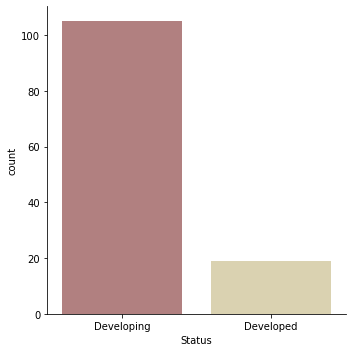

In [43]:
#Catplot for Categorical Column Status
sns.catplot(x="Status", kind="count", palette="pink", data=categorical_columns)

In [22]:
df['Status'].value_counts()

Developing    105
Developed      19
Name: Status, dtype: int64

In [45]:
high_life_expectancy = df.sort_values('Life expectency', ascending = False).head(10)
high_life_expectancy

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Under_five_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished_10_19,Malnourished_5_9,Life expectency
34,Denmark,Developed,71,0.0,66.0,9,58.8,0.0,93,93,0.1,5314.64416,5683483,1.1,0.9,86.0
26,Chile,Developing,82,2.0,97.0,9,63.8,2.0,96,96,0.1,13653.22640,17762681,0.8,0.8,85.0
33,Cyprus,Developed,52,0.0,97.0,0,6.3,0.0,97,97,0.1,2375.11270,116985,1.0,1.0,85.0
60,Japan,Developed,55,2.0,72.0,35,29.0,3.0,99,96,0.1,34474.13736,127141,2.1,1.8,83.7
6,Australia,Developed,59,1.0,93.0,74,66.6,1.0,93,93,0.1,56554.38760,23789338,0.6,0.6,82.8
51,Iceland,Developed,49,0.0,84.0,0,61.0,0.0,92,92,0.1,5734.44360,33815,1.0,0.9,82.7
58,Italy,Developed,56,1.0,93.0,159,63.6,2.0,93,93,0.1,349.14755,673582,0.6,0.6,82.7
57,Israel,Developing,58,0.0,96.0,80,64.9,1.0,95,95,0.1,35729.37253,8381,1.2,1.1,82.5
42,France,Developing,78,2.0,86.0,157,62.5,3.0,98,98,0.1,36526.77110,6662468,0.7,0.6,82.4
91,Romania,Developing,64,1.0,98.0,7,31.7,2.0,98,98,0.1,21008.33000,19760585,1.5,1.0,82.3


C:\Users\aaagr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Top 10 Countries With High Life Expectancy'}, xlabel='Country', ylabel='Life expectency'>

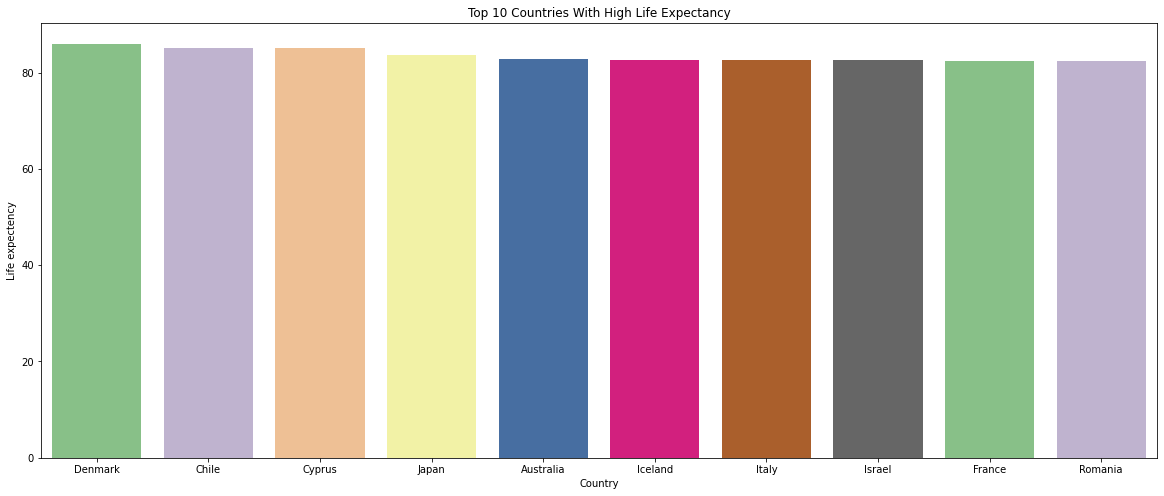

In [46]:
#Top 10 Countries with high life expectancy
plt.figure(figsize=(20,8))
plt.title("Top 10 Countries With High Life Expectancy")
sns.barplot(high_life_expectancy['Country'], high_life_expectancy['Life expectency'], palette='Accent')

C:\Users\aaagr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aaagr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aaagr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aaagr\anacond

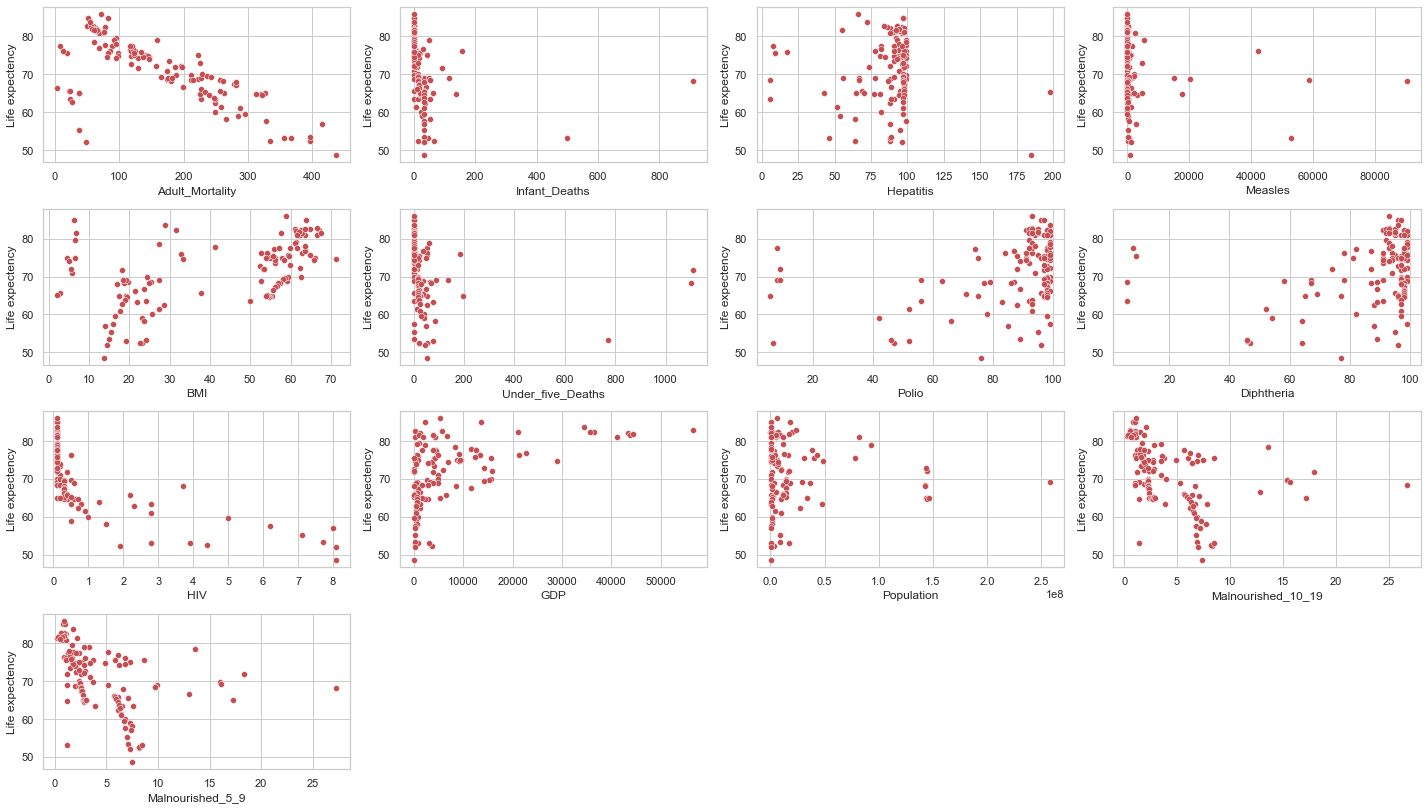

In [47]:
#Scatter Plot for understanding the relationship between of life expectancy and other features
new_numerical = numerical_columns.drop(['Life expectency'], axis=1);
fig = plt.figure(figsize = (20,25))
sns.set(style = 'whitegrid')
for i in range(len(new_numerical.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.scatterplot(new_numerical.iloc[:,i], df['Life expectency'],color='r')
plt.tight_layout()

C:\Users\aaagr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


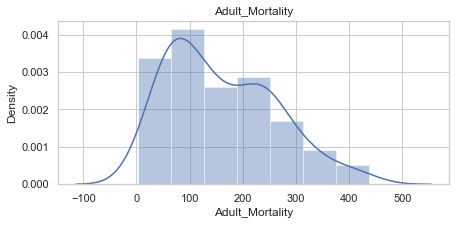

C:\Users\aaagr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


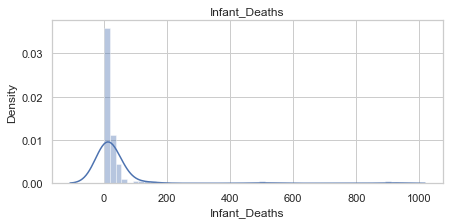

C:\Users\aaagr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


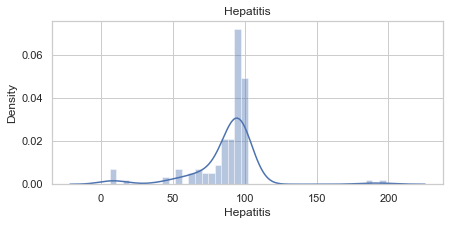

C:\Users\aaagr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


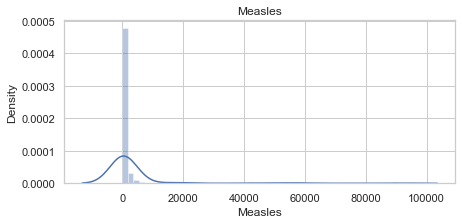

C:\Users\aaagr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


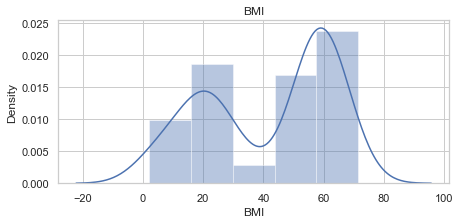

C:\Users\aaagr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


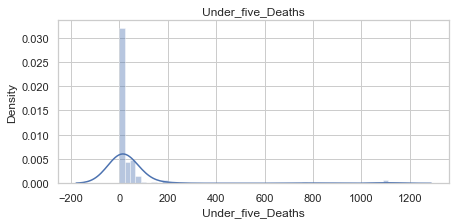

C:\Users\aaagr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


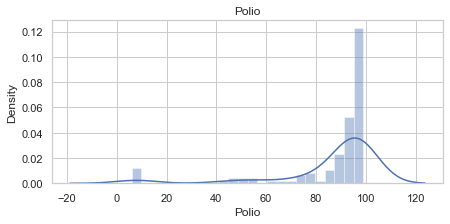

C:\Users\aaagr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


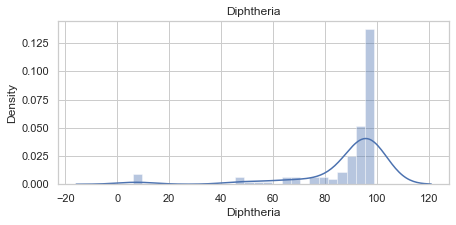

C:\Users\aaagr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


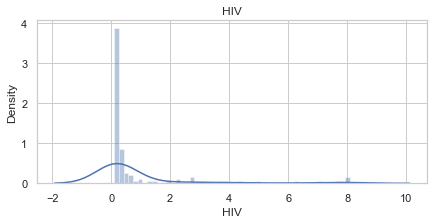

C:\Users\aaagr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


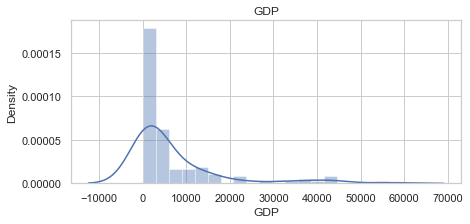

C:\Users\aaagr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


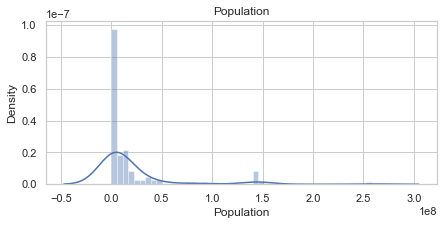

C:\Users\aaagr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


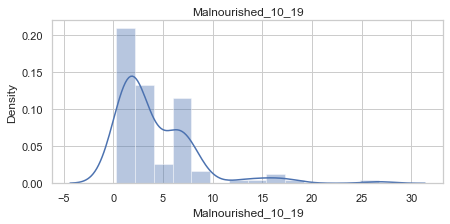

C:\Users\aaagr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


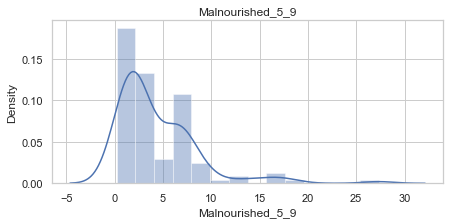

C:\Users\aaagr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


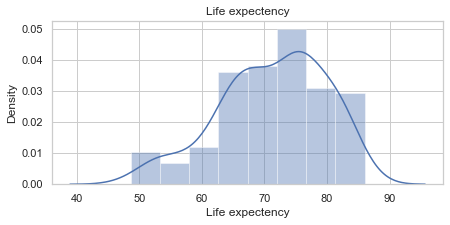

In [48]:
# checking normal distribution of the dataset by using distplot

num_values = df.select_dtypes(exclude='object')
num_list = num_values.columns.values.tolist()

for i in num_list:
    plt.figure(figsize=(7,3))
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

From above target variable (Expected) we understand that the majority of values purchased lie between 70 & 80 years

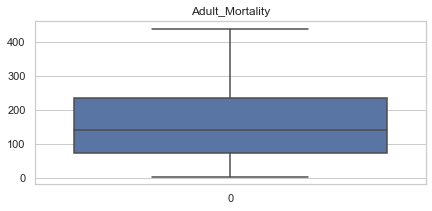

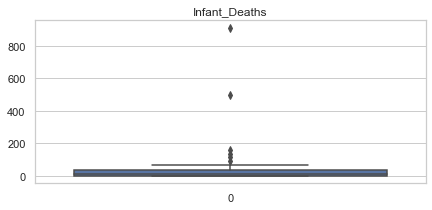

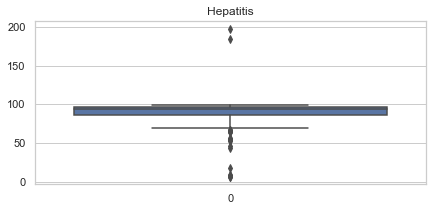

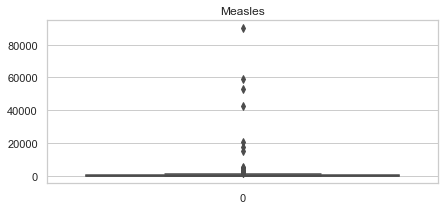

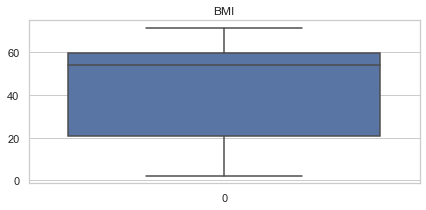

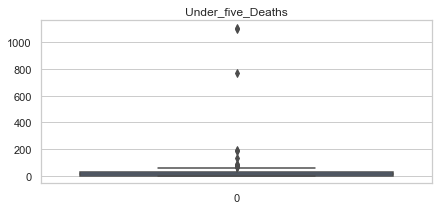

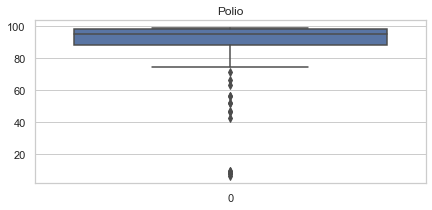

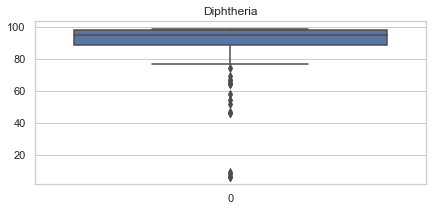

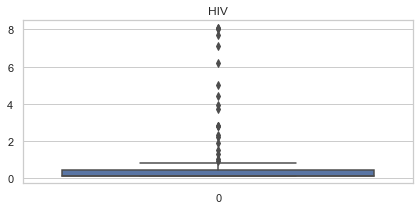

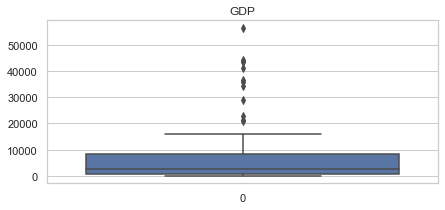

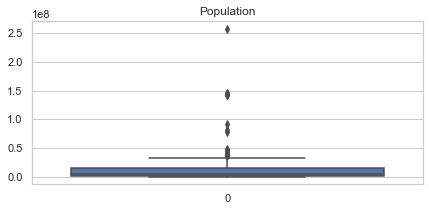

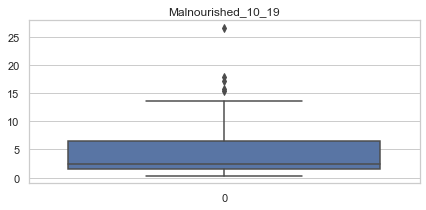

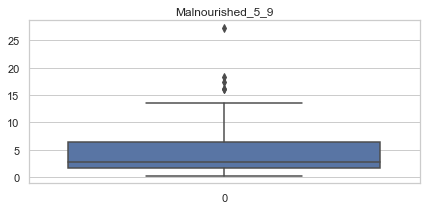

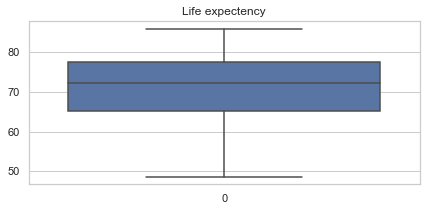

In [49]:
# Visualising outliers for numerical data

num_values = df.select_dtypes(exclude='object')
num_list = num_values.columns.values.tolist()

for i in num_list:
    plt.figure(figsize=(7,3))
    sns.boxplot(data=df[i])
    plt.title(i)
    plt.show()

C:\Users\aaagr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aaagr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aaagr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aaagr\anacond

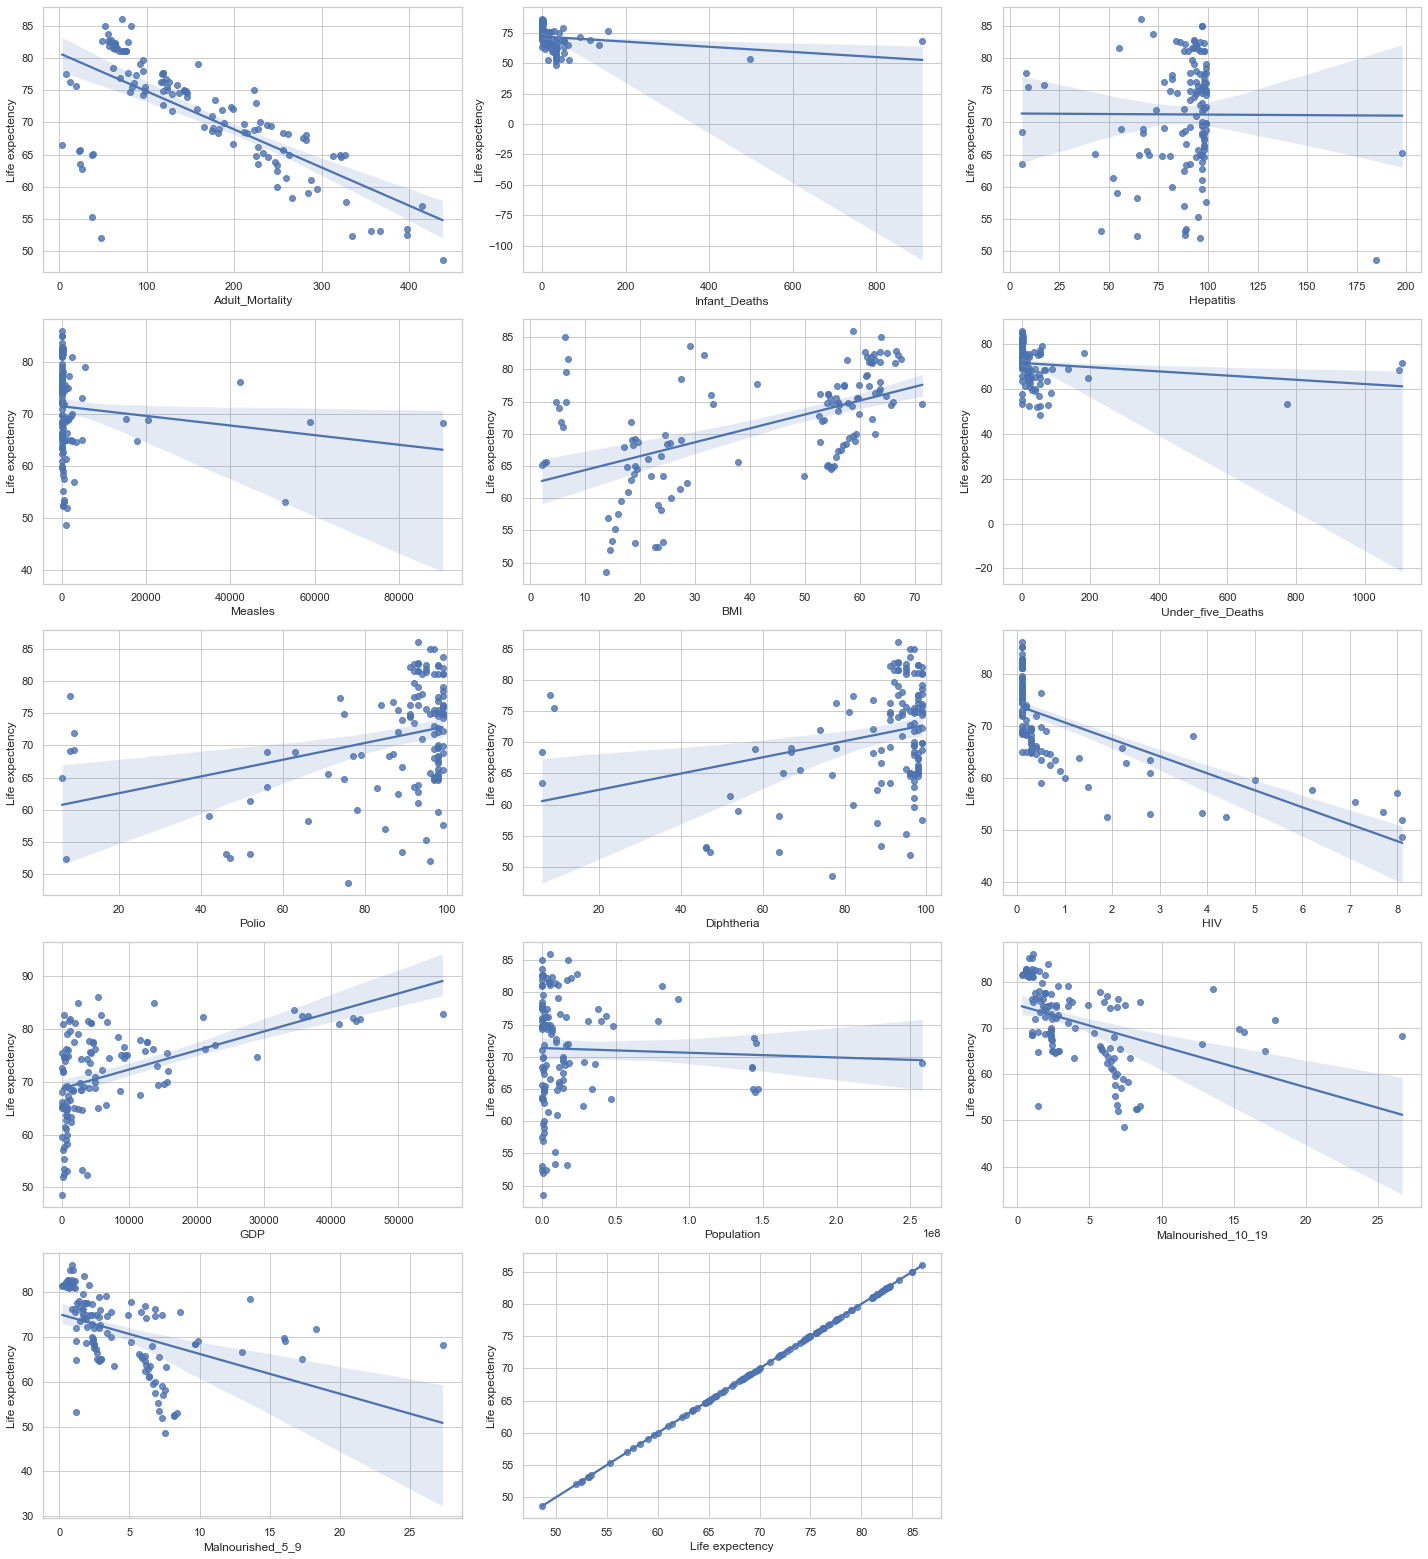

In [50]:
#Regplot for Outliers
fig = plt.figure(figsize = (20,30))
for i in range(len(numerical_columns.columns)):
    fig.add_subplot(7, 3, i+1)
    sns.regplot(numerical_columns.iloc[:,i], numerical_columns['Life expectency'])
plt.tight_layout()

In [51]:
#checking the correlation to get the relationship between the different features 
corelation = df.corr()
corelation

,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Under_five_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished_10_19,Malnourished_5_9,Life expectency
Adult_Mortality,1.000000,0.182540,0.098894,0.118974,-0.355814,0.126097,-0.274509,-0.198470,0.467842,-0.312615,0.100014,0.245312,0.275346,-0.710868
Infant_Deaths,0.182540,1.000000,-0.085585,0.850001,-0.231234,0.811227,-0.166017,-0.146124,0.109455,-0.132692,0.014886,0.467621,0.474060,-0.235394
Hepatitis,0.098894,-0.085585,1.000000,-0.091596,-0.061269,-0.066070,0.412135,0.684256,0.168245,0.038309,-0.010596,0.110305,0.023692,-0.004882
Measles,0.118974,0.850001,-0.091596,1.000000,-0.152164,0.652442,-0.110997,-0.113898,0.008327,-0.090549,0.022807,0.266472,0.337964,-0.125452
BMI,-0.355814,-0.231234,-0.061269,-0.152164,1.000000,-0.217940,0.296805,0.162938,-0.437901,0.389806,0.166865,-0.471861,-0.504309,0.539188
Under_five_Deaths,0.126097,0.811227,-0.066070,0.652442,-0.217940,1.000000,-0.115267,-0.112114,0.052421,-0.127324,-0.010185,0.498308,0.503949,-0.172348
Polio,-0.274509,-0.166017,0.412135,-0.110997,0.296805,-0.115267,1.000000,0.642188,-0.082841,0.159077,-0.121309,-0.225484,-0.256457,0.331566
Diphtheria,-0.198470,-0.146124,0.684256,-0.113898,0.162938,-0.112114,0.642188,1.000000,-0.079025,0.156255,0.041571,-0.033914,-0.139628,0.293787
HIV,0.467842,0.109455,0.168245,0.008327,-0.437901,0.052421,-0.082841,-0.079025,1.000000,-0.226209,-0.124122,0.245843,0.228223,-0.678452
GDP,-0.312615,-0.132692,0.038309,-0.090549,0.389806,-0.127324,0.159077,0.156255,-0.226209,1.000000,0.042159,-0.259829,-0.279711,0.463379


<AxesSubplot:>

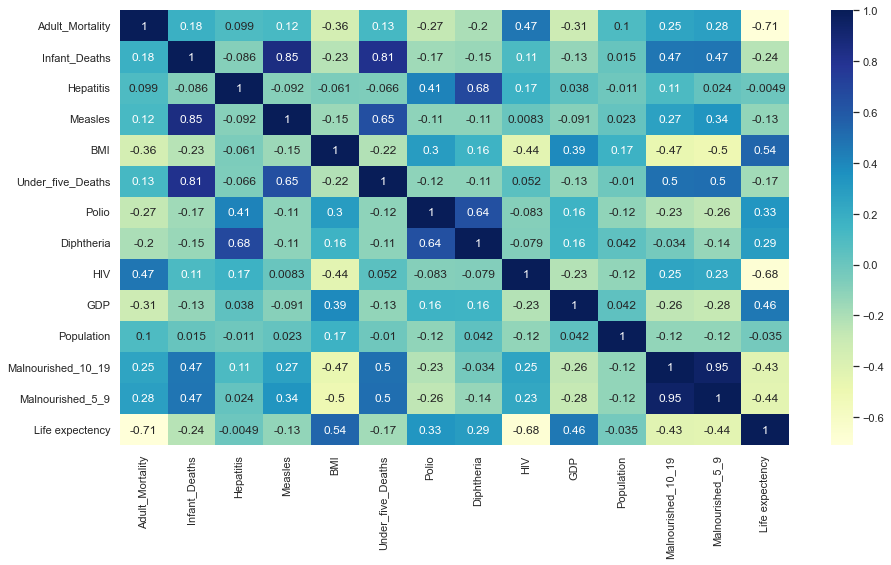

In [52]:
#Correlation Heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True,cmap="YlGnBu")

**Observation of correlation matrix:**

Life expectancy has a strong correlation with variables 'Income_Index','Schooling' and good correlation between 'BMI','Polio','Diphtheria','GDP'.
Also there is a strong correlation between 'Income_Index' & 'Schooling' and between 'Malnourished10_19' & 'Malnourished5_9'.
Life expectancy has least correlation with 'Adult_Mortality','Infant Deaths', 'Measles', ''HIV' and with 'Malnourished10_19' & 'Malnourished5_9'.
This implies that diseases and thinness dont have a direct bearing on life expectancy since a person can be thin and stilll live a long life or that a person can recover from diseases through treatment.

C:\Users\aaagr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


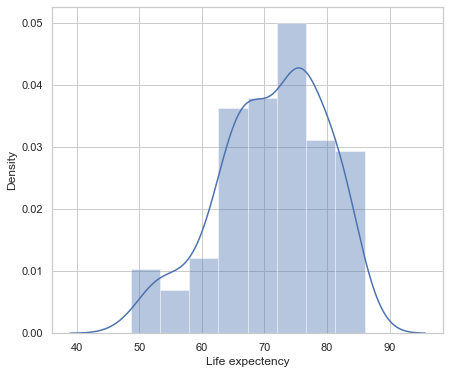

In [56]:
# Our target variable is the 'Life expectancy'

plt.figure(figsize=(7,6))
sns.distplot(df['Life expectency'])
plt.show()

One-Hot Encoding 

In [58]:
nominal_df = df[['Country']]
nominal_df.head()

,Country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Argentina


In [60]:
nominal_df = pd.get_dummies(data=nominal_df, drop_first=True)
nominal_df.head()

,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahrain,Country_Bangladesh,...,Country_United Kingdom,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
from sklearn.preprocessing import LabelEncoder
ordinal_df= df[['Status']]
ordinal_df = ordinal_df.apply(LabelEncoder().fit_transform)
ordinal_df.head()

,Status
0,1
1,1
2,1
3,1
4,1


In [68]:
#Add ordinal_df
df.drop(ordinal_df.columns, axis = 1, inplace = True)
df = df.join(ordinal_df)
df.head()

,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Under_five_Deaths,Polio,Diphtheria,HIV,GDP,...,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status
0,263,62.0,65.0,1154,19.1,52.17,6,65,0.1,584.259210,...,0,0,0,0,0,0,0,0,0,1
1,8,0.0,98.0,0,57.2,52.17,98,98,0.1,4575.763787,...,0,0,0,0,0,0,0,0,0,1
2,19,21.0,95.0,63,59.5,52.17,95,95,0.1,4132.762920,...,0,0,0,0,0,0,0,0,0,1
3,335,66.0,64.0,118,23.3,52.17,7,64,1.9,3695.793748,...,0,0,0,0,0,0,0,0,0,1
4,116,8.0,94.0,0,62.8,52.17,93,94,0.1,13467.123600,...,0,0,0,0,0,0,0,0,0,1


In [70]:
df.head()

,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Under_five_Deaths,Polio,Diphtheria,HIV,GDP,...,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status
0,263,62.0,65.0,1154,19.1,52.17,6,65,0.1,584.259210,...,0,0,0,0,0,0,0,0,0,1
1,8,0.0,98.0,0,57.2,52.17,98,98,0.1,4575.763787,...,0,0,0,0,0,0,0,0,0,1
2,19,21.0,95.0,63,59.5,52.17,95,95,0.1,4132.762920,...,0,0,0,0,0,0,0,0,0,1
3,335,66.0,64.0,118,23.3,52.17,7,64,1.9,3695.793748,...,0,0,0,0,0,0,0,0,0,1
4,116,8.0,94.0,0,62.8,52.17,93,94,0.1,13467.123600,...,0,0,0,0,0,0,0,0,0,1


Feature Scaling

As seen previosly, our dataset contains outliers and we did not remove or replace them. Outliers can skew a probability distribution and make data scaling using standardization difficult as the calculated mean and standard deviation will be skewed by the presence of the outliers.Therefore, we choose RobustScaler for our Feature scaling.

RobustScaler approach to standardizing input variables in the presence of outliers is to ignore the outliers from the calculation of the mean and standard deviation, then use the calculated values to scale the variable.

In [73]:
from sklearn.preprocessing import RobustScaler

for feature in df.columns:
    scaler = RobustScaler()
    df[[feature]]= scaler.fit_transform(df[[feature]])

In [76]:
Y = df['Life expectency']
X = df.drop(['Life expectency'],axis=1)

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2,random_state=42)

In [80]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import  SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [82]:
#LassoModel
lasso_reg = Lasso(alpha=0.0000001)
lasso_reg.fit(X_train,Y_train)

#Make Predictions
lasso_reg_testpred = lasso_reg.predict(X_test)
lasso_reg_trainpred = lasso_reg.predict(X_train)

#Calculating MSE and RMSE
lasso_train_mse = round(mean_squared_error(Y_train, lasso_reg_trainpred),4)
lasso_train_mae = round(mean_absolute_error(Y_train, lasso_reg_trainpred),4)
lasso_train_R2 = round(r2_score(Y_train,  lasso_reg_trainpred),4)
lasso_test_mse = round(mean_squared_error(Y_test, lasso_reg_testpred),4)
lasso_test_mae = round(mean_absolute_error(Y_test, lasso_reg_testpred),4)
lasso_test_R2= round(r2_score(Y_test,  lasso_reg_testpred),4)

print("Mean Squared Error of Random Forest for Training: ",lasso_train_mse)
print()
print("Mean Absolute Error of Random Forest for Training: ",lasso_train_mae)
print()
print("R2 Score of Random Forest for Training: ",lasso_train_R2)
print()
print("Mean Squared Error of Random Forest for Test: ",lasso_test_mse)
print()
print("Mean Absolute Error of Random Forest for Test: ",lasso_test_mae)
print()
print("R2 Score of KNN for Test: ",lasso_test_R2)

Mean Squared Error of Random Forest for Training:  0.0

Mean Absolute Error of Random Forest for Training:  0.0

R2 Score of Random Forest for Training:  1.0

Mean Squared Error of Random Forest for Test:  0.2455

Mean Absolute Error of Random Forest for Test:  0.3013

R2 Score of KNN for Test:  0.3659


In [84]:
#Ridge Model
ridge_model = Ridge(alpha=0.000000001)
ridge_model.fit(X_train,Y_train)

#Make Predictions
ridge_model_testpred = ridge_model.predict(X_test)
ridge_model_trainpred = ridge_model.predict(X_train)

#Calculating MSE and RMSE
ridge_train_mse = round(mean_squared_error(Y_train, ridge_model_trainpred),4)
ridge_train_mae = round(mean_absolute_error(Y_train, ridge_model_trainpred),4)
ridge_train_R2 = round(r2_score(Y_train,  ridge_model_trainpred),4)
ridge_test_mse = round(mean_squared_error(Y_test, ridge_model_testpred),4)
ridge_test_mae = round(mean_absolute_error(Y_test, ridge_model_testpred),4)
ridge_test_R2 = round(r2_score(Y_test,  ridge_model_testpred),4)


print("Mean Squared Error of Ridge Model for Training: ",ridge_train_mse)
print()
print("Mean Absolute Error of Ridge Model for Training: ",ridge_train_mae)
print()
print("R2 Score of Ridge Model for Training: ",ridge_train_R2)
print()
print("Mean Squared Error of Ridge Model for Test: ",ridge_test_mse)
print()
print("Mean Absolute Error of Ridge Model for Test: ",ridge_test_mae)
print()
print("R2 Score of Ridge for Test: ",ridge_test_R2)

Mean Squared Error of Ridge Model for Training:  0.0

Mean Absolute Error of Ridge Model for Training:  0.0

R2 Score of Ridge Model for Training:  1.0

Mean Squared Error of Ridge Model for Test:  0.2265

Mean Absolute Error of Ridge Model for Test:  0.3187

R2 Score of Ridge for Test:  0.4149


In [86]:
#Random Forest Model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train,Y_train)

#Make Predictions
rf_reg_testpred = rf_reg.predict(X_test)
rf_reg_trainpred = rf_reg.predict(X_train)

#Calculating MSE and RMSE
rf_train_mse = round(mean_squared_error(Y_train, rf_reg_trainpred),4)
rf_train_mae = round(mean_absolute_error(Y_train, rf_reg_trainpred),4)
rf_train_R2 = round(r2_score(Y_train,  rf_reg_trainpred),4)
rf_test_mse = round(mean_squared_error(Y_test, rf_reg_testpred),4)
rf_test_mae = round(mean_absolute_error(Y_test, rf_reg_testpred),4)
rf_test_R2= round(r2_score(Y_test,  rf_reg_testpred),4)



print("Mean Squared Error of Random Forest for Training: ",rf_train_mse)
print()
print("Mean Absolute Error of Random Forest for Training: ",rf_train_mae)
print()
print("R2 Score of Random Forest for Training: ",rf_train_R2)
print()
print("Mean Squared Error of Random Forest for Test: ",rf_test_mse)
print()
print("Mean Absolute Error of Random Forest for Test: ",rf_test_mae)
print()
print("R2 Score of Random Forest for Test: ",rf_test_R2)

Mean Squared Error of Random Forest for Training:  0.0104

Mean Absolute Error of Random Forest for Training:  0.0692

R2 Score of Random Forest for Training:  0.9787

Mean Squared Error of Random Forest for Test:  0.0425

Mean Absolute Error of Random Forest for Test:  0.1585

R2 Score of Random Forest for Test:  0.8902


In [88]:
#KNN Model
knn_reg = KNeighborsRegressor(n_neighbors=10)
knn_reg.fit(X_train, Y_train)

#Make Predictions
knn_reg_testpred = knn_reg.predict(X_test)
knn_reg_trainpred = knn_reg.predict(X_train)

#Calculating MSE and RMSE
mse_1 = round(mean_squared_error(Y_train, knn_reg_trainpred),4)
mae_1 = round(mean_absolute_error(Y_train, knn_reg_trainpred),4)
r2_score_1 = round(r2_score(Y_train,  knn_reg_trainpred),4)
mse_2 = round(mean_squared_error(Y_test, knn_reg_testpred),4)
mae_2 = round(mean_absolute_error(Y_test, knn_reg_testpred),4)
r2_score_2 = round(r2_score(Y_test,  knn_reg_testpred),4)


print("Mean Squared Error of KNN for Training: ",mse_1)
print()
print("Mean Absolute Error of KNN for Training: ",mae_1)
print()
print("R2 Score of KNN for Training: ",r2_score_1)
print()
print("Mean Squared Error of KNN for Test: ",mse_2)
print()
print("Mean Absolute Error of KNN for Test: ",mae_2)
print()
print("R2 Score of KNN for Test: ",r2_score_2)

Mean Squared Error of KNN for Training:  0.1416

Mean Absolute Error of KNN for Training:  0.296

R2 Score of KNN for Training:  0.71

Mean Squared Error of KNN for Test:  0.0677

Mean Absolute Error of KNN for Test:  0.216

R2 Score of KNN for Test:  0.8251


In [90]:
#Decision Tree Regressor
dt_reg = DecisionTreeRegressor(max_depth=5,min_samples_leaf=7)
dt_reg.fit(X_train, Y_train)

#Make Predictions
dt_reg_testpred = dt_reg.predict(X_test)
dt_reg_trainpred = dt_reg.predict(X_train)

#Calculating MSE, MAE and R2
dt_train_mse = round(mean_squared_error(Y_train, dt_reg_trainpred),4)
dt_train_mae = round(mean_absolute_error(Y_train, dt_reg_trainpred),4)
dt_train_R2= round(r2_score(Y_train,  dt_reg_trainpred),4)
dt_test_mse = round(mean_squared_error(Y_test, dt_reg_testpred),4)
dt_test_mae = round(mean_absolute_error(Y_test, dt_reg_testpred),4)
dt_test_R2 = round(r2_score(Y_test,  dt_reg_testpred),4)


print("Mean Squared Error of Decision Tree for Training: ",dt_train_mse)
print()
print("Mean Absolute Error of Decision Tree for Training: ",dt_train_mae )
print()
print("R2 Score of Decision Tree for Training: ",dt_train_R2)
print()
print("Mean Squared Error of Decision Tree for Test: ",dt_test_mse)
print()
print("Mean Absolute Error of Decision Tree for Test: ",dt_test_mae)
print()
print("R2 Score of Decision Tree for Test: ",dt_test_R2)

Mean Squared Error of Decision Tree for Training:  0.0446

Mean Absolute Error of Decision Tree for Training:  0.155

R2 Score of Decision Tree for Training:  0.9087

Mean Squared Error of Decision Tree for Test:  0.0799

Mean Absolute Error of Decision Tree for Test:  0.2058

R2 Score of Decision Tree for Test:  0.7937


In [92]:
#SVR Model
svr_reg = SVR(gamma='scale')
svr_reg.fit(X_train, Y_train)

#Make Predictions
svr_reg_testpred = svr_reg.predict(X_test)
svr_reg_trainpred = svr_reg.predict(X_train)

#Calculating MSE and RMSE
svr_train_mse = round(mean_squared_error(Y_train, svr_reg_trainpred),4)
svr_train_mae = round(mean_absolute_error(Y_train, svr_reg_trainpred),4)
svr_train_R2 = round(r2_score(Y_train,  svr_reg_trainpred),4)
svr_test_mse= round(mean_squared_error(Y_test, svr_reg_testpred),4)
svr_test_mae = round(mean_absolute_error(Y_test, svr_reg_testpred),4)
svr_test_R2 = round(r2_score(Y_test,  svr_reg_testpred),4)


print("Mean Squared Error of SVR for Training: ",svr_train_mse)
print()
print("Mean Absolute Error of SVR for Training: ",svr_train_mae)
print()
print("R2 Score of SVR for Training: ",svr_train_R2)
print()
print("Mean Squared Error of SVR for Test: ",svr_test_mse)
print()
print("Mean Absolute Error of SVR for Test: ",svr_test_mae)
print()
print("R2 Score of SVR for Test: ",svr_test_R2 )

Mean Squared Error of SVR for Training:  0.1038

Mean Absolute Error of SVR for Training:  0.2499

R2 Score of SVR for Training:  0.7875

Mean Squared Error of SVR for Test:  0.0787

Mean Absolute Error of SVR for Test:  0.2442

R2 Score of SVR for Test:  0.7966


In [94]:
#Gradient Boosting Regressor Model
gb_reg = GradientBoostingRegressor(n_estimators=200,max_depth=3)
gb_reg.fit(X_train, Y_train)

#Make Predictions
gb_reg_testpred = gb_reg.predict(X_test)
gb_reg_trainpred = gb_reg.predict(X_train)

#Calculating MSE and RMSE

gb_train_mse = round(mean_squared_error(Y_train, gb_reg_trainpred),4)
gb_train_mae = round(mean_absolute_error(Y_train, gb_reg_trainpred),4)
gb_train_R2 = round(r2_score(Y_train,  gb_reg_trainpred),4)
gb_test_mse= round(mean_squared_error(Y_test, gb_reg_testpred),4)
gb_test_mae = round(mean_absolute_error(Y_test, gb_reg_testpred),4)
gb_test_R2 = round(r2_score(Y_test,  gb_reg_testpred),4)


print("Mean Squared Error of Gradient Boosting for Training: ",gb_train_mse)
print()
print("Mean Absolute Error of Gradient Boosting for Training: ",gb_train_mae)
print()
print("R2 Score of Gradient Boosting for Training: ",gb_train_R2)
print()
print("Mean Squared Error of Gradient Boosting for Test: ",gb_test_mse)
print()
print("Mean Absolute Error of Gradient Boosting for Test: ",gb_test_mae)
print()
print("R2 Score of Gradient Boosting for Test: ",gb_test_R2 )

Mean Squared Error of Gradient Boosting for Training:  0.0002

Mean Absolute Error of Gradient Boosting for Training:  0.0138

R2 Score of Gradient Boosting for Training:  0.9995

Mean Squared Error of Gradient Boosting for Test:  0.0425

Mean Absolute Error of Gradient Boosting for Test:  0.1449

R2 Score of Gradient Boosting for Test:  0.8902


In [96]:
#AdaBoostRegressor
ab_reg = AdaBoostRegressor(learning_rate=0.2,n_estimators=100)
ab_reg.fit(X_train, Y_train)

#Make Predictions
ab_reg_testpred = ab_reg.predict(X_test)
ab_reg_trainpred = ab_reg.predict(X_train)

#Calculating MSE and RMSE
ab_train_mse = round(mean_squared_error(Y_train, ab_reg_trainpred),4)
ab_train_mae = round(mean_absolute_error(Y_train, ab_reg_trainpred),4)
ab_train_R2 = round(r2_score(Y_train, ab_reg_trainpred),4)
ab_test_mse= round(mean_squared_error(Y_test, ab_reg_testpred),4)
ab_test_mae = round(mean_absolute_error(Y_test, ab_reg_testpred),4)
ab_test_R2 = round(r2_score(Y_test,  ab_reg_testpred),4)


print("Mean Squared Error of Ada Boost for Training: ",ab_train_mse)
print()
print("Mean Absolute Error of Ada Boost for Training: ",ab_train_mae)
print()
print("R2 Score of Ada Boost for Training: ",ab_train_R2)
print()
print("Mean Squared Error of Ada Boost for Test: ",ab_test_mse)
print()
print("Mean Absolute Error of Ada Boost for Test: ",ab_test_mae)
print()
print("R2 Score of Ada Boost for Test: ",ab_test_R2 )

Mean Squared Error of Ada Boost for Training:  0.0166

Mean Absolute Error of Ada Boost for Training:  0.1011

R2 Score of Ada Boost for Training:  0.966

Mean Squared Error of Ada Boost for Test:  0.0431

Mean Absolute Error of Ada Boost for Test:  0.1514

R2 Score of Ada Boost for Test:  0.8886


In [98]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=0, shuffle=True) # k=10, split the data into 10 equal parts
xyz=[]
std=[]
predictive_models=['Lasso','Ridge','Random Forest','KNN','Decision Tree','SVR','Gradient Boosting Regressor','Ada Boosting Regressor']
models=[Lasso(alpha=0.00000001), Ridge(alpha=0.000000001), RandomForestRegressor(n_estimators=100, random_state=42), KNeighborsRegressor(n_neighbors=10), DecisionTreeRegressor(max_depth=5,min_samples_leaf=7), SVR(gamma='scale'), GradientBoostingRegressor(n_estimators=200,max_depth=3), AdaBoostRegressor(learning_rate=0.2,n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X_train,Y_train, cv = kfold, scoring="r2")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
   
new_models_dataframe2=pd.DataFrame({'CV R2 Mean':xyz,'Std':std},index=predictive_models)       
new_models_dataframe2

,CV R2 Mean,Std
Lasso,0.462786,0.296439
Ridge,0.573150,0.224015
Random Forest,0.844445,0.085293
KNN,0.555683,0.204656
Decision Tree,0.671936,0.250927
SVR,0.554357,0.121757
Gradient Boosting Regressor,0.843283,0.076248
Ada Boosting Regressor,0.833585,0.074798


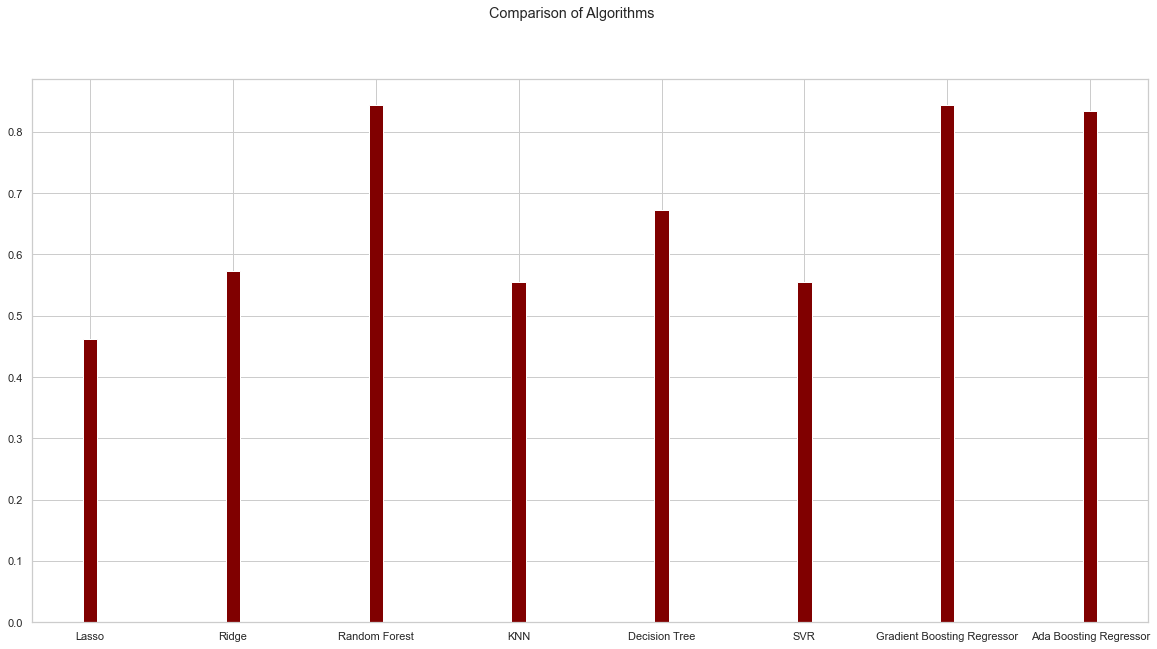

In [99]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Comparison of Algorithms')
cv_results = []
for i in range(len(cv_results)):
    cv_results.append(cv_results[i][1])
plt.bar(predictive_models, xyz, color ='maroon', width=0.10)
plt.show()